# Titanic Train

# Dataframe Description:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Loading of dataset


In [2]:
df=pd.read_csv('Titanic')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Successfully Imported Data!

From above lines we can learn that there are total 891 observations with 12 different feature variables/attributes present in the Abalone Case Study dataset.


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


# Lets find the shape 


In [8]:
df.shape

(891, 12)

Training Dataset comprises 891 observations(rows) and 12 features(columns).
Out of the 12, one is the target variable and rest 11 are input variables.

In [9]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S


In [10]:
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S


In [11]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C


# Overview of the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that, all 12 columns are of numeric data types. 
Let's investigate further the data as there is a possibility that some of the values that are not null are set to 0 instead.

# Lets check the datatypes

In [13]:
# Checking the datatypes of the columns:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Checking Null values in the Dataframe

In [15]:
#Checking the null values in dataset
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since there is null values present in the dataset and its mainly present in age and cabin. So we will further check the process.   

In [16]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Heatmap for expressing correlation

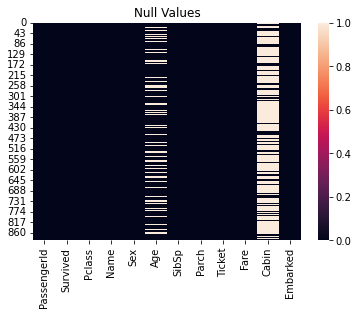

In [18]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have many missing values, we try to fill missing vaues in Data-preprocessing step


In [23]:
df['Age'].replace(np.NaN,df['Age'].median(),inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
df['Embarked'].mode()

0    S
dtype: object

In [25]:
df['Embarked'].replace(np.NaN,'S',inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Dropping Cabin column The null values of this column is much higher. It can't be filled with its mean,median and mode because this column datas should be unique.



In [26]:
df.drop('Cabin', axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Univariate Analysis

# Exploratory Data Analysis


# Distplot

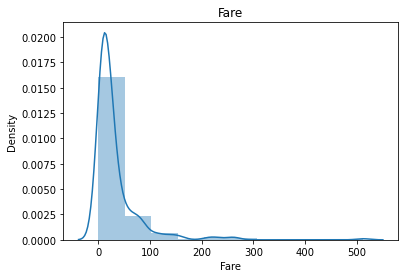

In [30]:
sns.distplot(df['Fare'],bins=10)
plt.title('Fare')
plt.show()

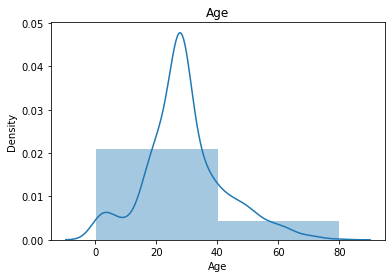

In [35]:
sns.distplot(df['Age'],bins=2)
plt.title('Age')
plt.show()

# Countplot

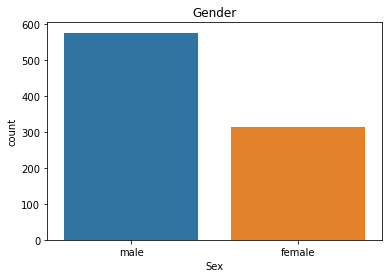

In [36]:
sns.countplot(x='Sex',data=df)
plt.title('Gender')
plt.show()

The histogram shows that about twice male died than female.



<AxesSubplot:xlabel='Sex', ylabel='count'>

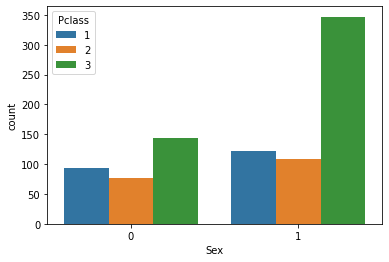

In [93]:
sns.countplot('Sex',data=df, hue='Pclass')

when segregated in their ticket classes; Appears like more than twice male and Female died who were in 3rd class seats compared to first class and second class. What is surprising is that more first class travelers died that second class.

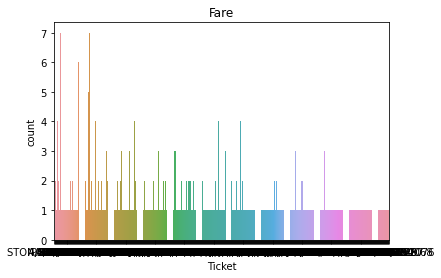

In [37]:
sns.countplot(x='Ticket',data=df)
plt.title('Fare')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

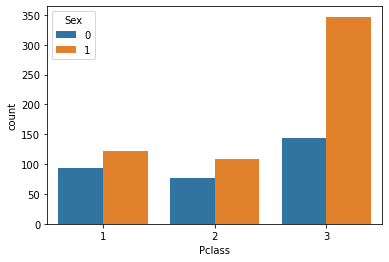

In [94]:
sns.countplot('Pclass',data=df, hue='Sex')

To further look into the classes and how it correlation with death of people travelling in the Titanic; Again proving that in the whole disaster female deaths were less, could be because of female and kids before male policy followed in emergencies.

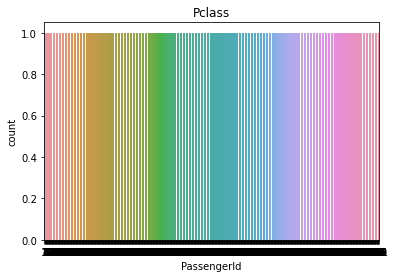

In [38]:
sns.countplot(x='PassengerId',data=df)
plt.title('Pclass')
plt.show()

In [95]:
def male_female_child(passenger):
    Age, Sex = passenger
    if Age < 15:
        return 'child'
    else:
        return Sex

In [96]:
df['person'] = df[['Age','Sex']].apply(male_female_child,axis=1)

Since the data didnt have child classification I broke age below 15 to be a child.



<AxesSubplot:xlabel='Pclass', ylabel='count'>

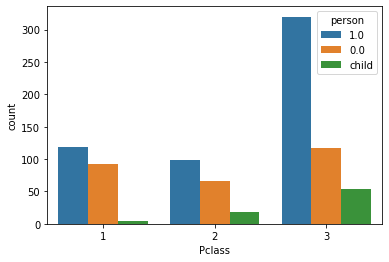

In [97]:
sns.countplot('Pclass',data=df, hue='person')

Child death were the lowest in the incident.



In [98]:
def Status(Report):
    Rat = Report
    if Rat == 1:
        return "Surv"
    else:
        return "Death"

In [99]:
df['Status'] = df['Survived'].apply(Status)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person,Status
0,0,3,1,22.0,1,0,7.2500,2,1.0,Death
1,1,1,0,38.0,1,0,71.2833,0,0.0,Surv
2,1,3,0,26.0,0,0,7.9250,2,0.0,Surv
3,1,1,0,35.0,1,0,53.1000,2,0.0,Surv
4,0,3,1,35.0,0,0,8.0500,2,1.0,Death
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1.0,Death
887,1,1,0,19.0,0,0,30.0000,2,0.0,Surv
888,0,3,0,28.0,1,2,23.4500,2,0.0,Death
889,1,1,1,26.0,0,0,30.0000,0,1.0,Surv


# Histogram

<AxesSubplot:>

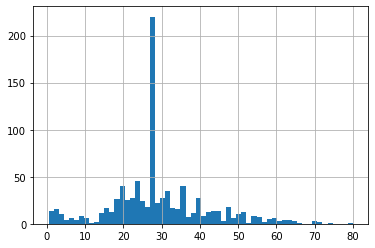

In [100]:
df['Age'].hist(bins=60)

To further analyze if age of a person had any impact on their surviving;It is seen that the most death were in the age 20-40.

Dropping PassengerId, Name and Ticket

In [39]:
df.drop('PassengerId', axis=1, inplace=True)

In [40]:
df.drop('Name', axis=1, inplace=True)

In [41]:
df.drop('Ticket', axis=1, inplace=True)

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Label Encoding

In [43]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()
list1=['Sex', 'Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [46]:
df.shape

(891, 8)

# Multivariate Analysis

# Correlations:

In [47]:
dfcorr=df.corr()
dfcorr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

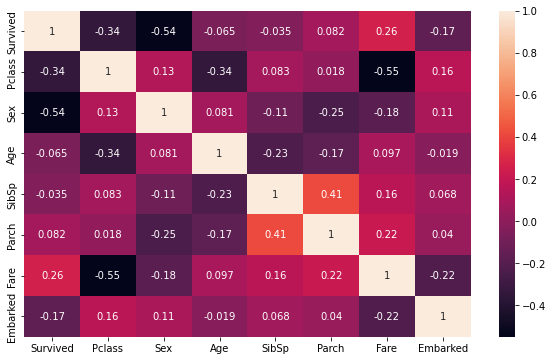

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcorr,annot=True)

# Scatterplot:

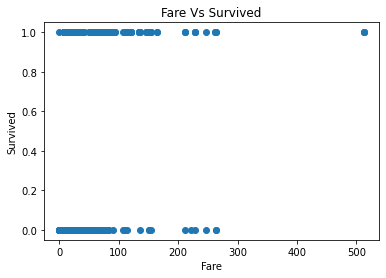

In [49]:
plt.scatter(df['Fare'],df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Fare Vs Survived')
plt.show()

Survived Count is positively correlated with Fare Amount


# Removing Outliers

In [51]:
df.shape

(891, 8)

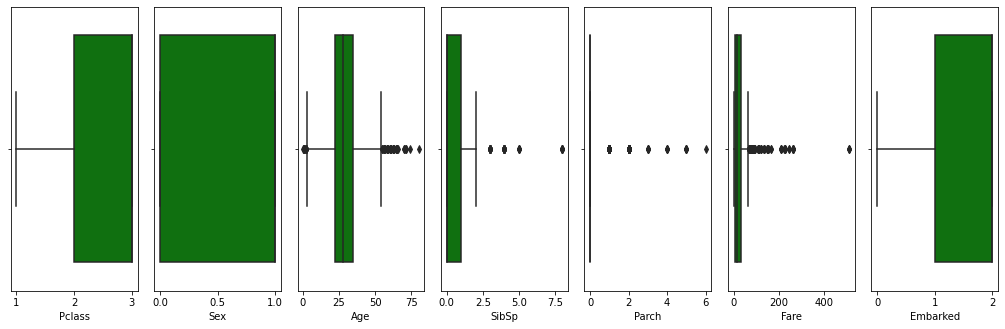

In [52]:
collist=df.columns.values
ncol=9
nrows=10

plt.figure(figsize=(2*ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

# Using Z Score method

In [53]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]

In [54]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [55]:
new_df.shape

(820, 8)

Percentage of dataloss during removal of outliers using zscore method

In [56]:
P=(891-820)*100/891
P

7.968574635241302

# IQR Method

In [57]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print(IQR)

Survived     1.0000
Pclass       1.0000
Sex          1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
Embarked     1.0000
dtype: float64


In [58]:
df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df_new1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
884,0,3,1,25.0,0,0,7.0500,2
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


Percentage of dataloss during removal of outliers using IQR method



In [59]:
P1=(891-577)*100/891
P1

35.24130190796858

We observed that using Zscore method outliers are removed and only 7.96% data is lost where as 35.24% data loss in IQR. So we will proceed with zscore method.



# Checking Skewness

In [60]:
new_df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

<AxesSubplot:ylabel='Frequency'>

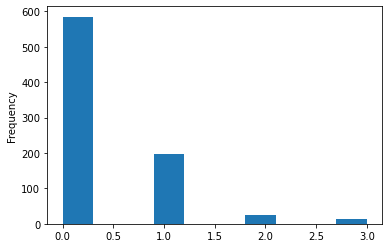

In [61]:
new_df['SibSp'].plot.hist()

In [62]:
SibSp_sqrt=np.sqrt(new_df['SibSp'])
SibSp_sqrt.skew()

1.136758428705327

<AxesSubplot:ylabel='Frequency'>

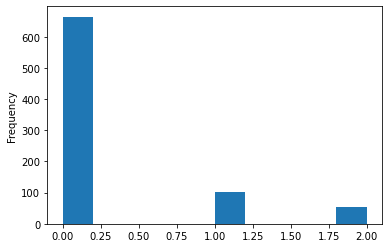

In [63]:
new_df['Parch'].plot.hist()

In [64]:
Parch_sqrt=np.sqrt(new_df['Parch'])
Parch_sqrt.skew()

1.7233514768300893

<AxesSubplot:ylabel='Frequency'>

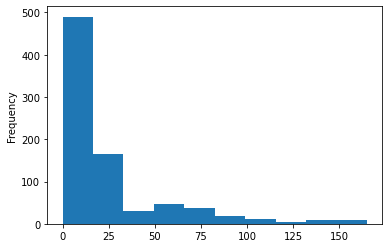

In [66]:
new_df['Fare'].plot.hist()

In [67]:
Fare_sqrt=np.sqrt(new_df['Fare'])
Fare_sqrt.skew()

1.350428111936211

# Machine Learning

Taking Survived column as target column

In [68]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


# iloc technique:

In [69]:
y=pd.DataFrame(new_df.iloc[:,0])

y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [71]:
x=new_df.iloc[:,1:7]
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [72]:
x.shape

(820, 6)

In [73]:
y.shape

(820, 1)

# Data Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)
scaledX

array([[ 0.8339949 ,  0.72203588, -0.61192649,  1.05195589, -0.4511409 ,
        -0.62370675],
       [-1.58680446, -1.38497273,  0.70321021,  1.05195589, -0.4511409 ,
         1.52510914],
       [ 0.8339949 , -1.38497273, -0.28314231, -0.56340709, -0.4511409 ,
        -0.60105524],
       ...,
       [ 0.8339949 , -1.38497273, -0.11875023,  1.05195589,  3.0889121 ,
        -0.08007059],
       [-1.58680446,  0.72203588, -0.28314231, -0.56340709, -0.4511409 ,
         0.13973292],
       [ 0.8339949 ,  0.72203588,  0.21003395, -0.56340709, -0.4511409 ,
        -0.60692786]])

# Finding the best random state


In [75]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 43


# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=43)
lg=LogisticRegression()
lg.fit(train_x,train_y)
lg_y=lg.predict(test_x)

print("Accuracy Score",accuracy_score(test_y,lg_y))
print("Confusion Matrix\n",confusion_matrix(test_y,lg_y))
print("Classification Report\n", classification_report(test_y,lg_y))

Accuracy Score 0.8390243902439024
Confusion Matrix
 [[110  17]
 [ 16  62]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       127
           1       0.78      0.79      0.79        78

    accuracy                           0.84       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.84      0.84      0.84       205



As the target column deals with only 0 and 1. We can use Classification algorithm to create a best model



# Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc_y=dtc.predict(test_x)

print("Accuracy Score",accuracy_score(test_y,dtc_y))
print("Confusion Matrix\n",confusion_matrix(test_y,dtc_y))
print("Classification Report\n", classification_report(test_y,dtc_y))

Accuracy Score 0.7951219512195122
Confusion Matrix
 [[104  23]
 [ 19  59]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       127
           1       0.72      0.76      0.74        78

    accuracy                           0.80       205
   macro avg       0.78      0.79      0.78       205
weighted avg       0.80      0.80      0.80       205



# KNeighbors Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(train_x,train_y)
knn_y=knn.predict(test_x)

print("Accuracy Score",accuracy_score(test_y,knn_y))
print("Confusion Matrix\n",confusion_matrix(test_y,knn_y))
print("Classification Report\n", classification_report(test_y,knn_y))

Accuracy Score 0.7024390243902439
Confusion Matrix
 [[99 28]
 [33 45]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.78      0.76       127
           1       0.62      0.58      0.60        78

    accuracy                           0.70       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.70      0.70      0.70       205



# Support Vector Machine

In [79]:
from sklearn.svm import SVC

def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(train_x,train_y)
    svc.score(train_x,train_y)
    svc_y=svc.predict(test_x)
    print("Accuracy Score",accuracy_score(test_y,svc_y))
    print("Confusion Matrix\n",confusion_matrix(test_y,svc_y))
    print("Classification Report\n", classification_report(test_y,svc_y))

In [80]:
svmkernel('rbf')

Accuracy Score 0.751219512195122
Confusion Matrix
 [[118   9]
 [ 42  36]]
Classification Report
               precision    recall  f1-score   support

           0       0.74      0.93      0.82       127
           1       0.80      0.46      0.59        78

    accuracy                           0.75       205
   macro avg       0.77      0.70      0.70       205
weighted avg       0.76      0.75      0.73       205



In [81]:
svmkernel('poly')

Accuracy Score 0.7170731707317073
Confusion Matrix
 [[125   2]
 [ 56  22]]
Classification Report
               precision    recall  f1-score   support

           0       0.69      0.98      0.81       127
           1       0.92      0.28      0.43        78

    accuracy                           0.72       205
   macro avg       0.80      0.63      0.62       205
weighted avg       0.78      0.72      0.67       205



In [82]:
svmkernel('linear')

Accuracy Score 0.8341463414634146
Confusion Matrix
 [[110  17]
 [ 17  61]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       127
           1       0.78      0.78      0.78        78

    accuracy                           0.83       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.83      0.83      0.83       205



# Naive Bayes



In [83]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(train_x,train_y)
gnb_y=gnb.predict(test_x)

print("Accuracy Score",accuracy_score(test_y,gnb_y))
print("Confusion Matrix\n",confusion_matrix(test_y,gnb_y))
print("Classification Report\n", classification_report(test_y,gnb_y))

Accuracy Score 0.824390243902439
Confusion Matrix
 [[103  24]
 [ 12  66]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       127
           1       0.73      0.85      0.79        78

    accuracy                           0.82       205
   macro avg       0.81      0.83      0.82       205
weighted avg       0.83      0.82      0.83       205



# RandomForestClassifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100,random_state=43)
rfc.fit(train_x,train_y)
rfc_y=rfc.predict(test_x)

print("Accuracy Score",accuracy_score(test_y,rfc_y))
print("Confusion Matrix\n",confusion_matrix(test_y,rfc_y))
print("Classification Report\n", classification_report(test_y,rfc_y))

Accuracy Score 0.8195121951219512
Confusion Matrix
 [[108  19]
 [ 18  60]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       127
           1       0.76      0.77      0.76        78

    accuracy                           0.82       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.82      0.82      0.82       205



# AdaBoostClassifier

In [85]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()
abc.fit(train_x,train_y)
abc_y=abc.predict(test_x)

print("Accuracy Score",accuracy_score(test_y,abc_y))
print("Confusion Matrix\n",confusion_matrix(test_y,abc_y))
print("Classification Report\n", classification_report(test_y,abc_y))

Accuracy Score 0.8390243902439024
Confusion Matrix
 [[106  21]
 [ 12  66]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       127
           1       0.76      0.85      0.80        78

    accuracy                           0.84       205
   macro avg       0.83      0.84      0.83       205
weighted avg       0.85      0.84      0.84       205



# GradientBoostingClassifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=AdaBoostClassifier()
gbc.fit(train_x,train_y)
gbc_y=gbc.predict(test_x)

print("Accuracy Score",accuracy_score(test_y,gbc_y))
print("Confusion Matrix\n",confusion_matrix(test_y,gbc_y))
print("Classification Report\n", classification_report(test_y,gbc_y))

Accuracy Score 0.8390243902439024
Confusion Matrix
 [[106  21]
 [ 12  66]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       127
           1       0.76      0.85      0.80        78

    accuracy                           0.84       205
   macro avg       0.83      0.84      0.83       205
weighted avg       0.85      0.84      0.84       205



# CROSS VALIDATION

We can finalize the model using cross validation



In [87]:
#for example
#DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(), dtcscores.std())

[0.68902439 0.7804878  0.82926829 0.73170732 0.81707317]
0.7695121951219511 0.052651300353470494


# Conclusion:

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Titanic')

In [5]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GradientBoostingClassifier','Random Forest','Naive Bayes', 'AdaBoostClassifier',],
    'Score': [0.83,0.70,0.75,0.79,0.83,0.81,0.82,0.83]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.83,Logistic Regression
0.83,GradientBoostingClassifier
0.83,AdaBoostClassifier
0.82,Naive Bayes
0.81,Random Forest
0.79,Decision Tree
0.75,SVC
0.70,KNN


Conclusion:

On the basis of Accuracy Score The Best Model is done by Logistic Regression, AdaBoosterClassifier and GradientBoostingClassifier having accuracy score of 0.83.